In [1]:
# Demand (sales) model

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import compare
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Directory
in_dir = '/Users/jsmatte/github/MATH80624A/data'

In [4]:
# Load data
df = pd.read_csv(in_dir + '/train_v9rqX0R.csv')
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [5]:
# Filter df to keep only snack food
snack_df = df[df['Item_Type'] == 'Snack Foods']
print(len(snack_df))
print(len(np.unique(snack_df.Item_Identifier.values)))

1200
220


In [6]:
# check if price is consistent accross outlets -> NO!
print(snack_df[snack_df['Item_Identifier'] == 'FDO10'])

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
6              FDO10        13.65          Regular         0.012741   
781            FDO10        13.65          Regular         0.000000   
945            FDO10        13.65          Regular         0.021344   
1576           FDO10        13.65              reg         0.012752   
4552           FDO10          NaN          Regular         0.000000   
6802           FDO10        13.65          Regular         0.012824   
8164           FDO10          NaN          Regular         0.012690   
8197           FDO10        13.65          Regular         0.012749   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
6     Snack Foods   57.6588            OUT013                       1987   
781   Snack Foods   55.8588            OUT045                       2002   
945   Snack Foods   58.3588            OUT010                       1998   
1576  Snack Foods   55.5588            OUT046           

In [7]:
# Replance NaN values by 'Other' (only for Outlet_Size key)
snack_df['Outlet_Size'] = snack_df.Outlet_Size.fillna('Other').values
print(snack_df[snack_df['Item_Identifier'] == 'FDO10'])

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
6              FDO10        13.65          Regular         0.012741   
781            FDO10        13.65          Regular         0.000000   
945            FDO10        13.65          Regular         0.021344   
1576           FDO10        13.65              reg         0.012752   
4552           FDO10          NaN          Regular         0.000000   
6802           FDO10        13.65          Regular         0.012824   
8164           FDO10          NaN          Regular         0.012690   
8197           FDO10        13.65          Regular         0.012749   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
6     Snack Foods   57.6588            OUT013                       1987   
781   Snack Foods   55.8588            OUT045                       2002   
945   Snack Foods   58.3588            OUT010                       1998   
1576  Snack Foods   55.5588            OUT046           

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Create categorical data
snack_df['Item_Fat_Content_cat'] = pd.Categorical(snack_df.Item_Fat_Content)
snack_df['Outlet_Size_cat'] = pd.Categorical(snack_df.Outlet_Size)
snack_df['Outlet_Location_Type_cat'] = pd.Categorical(snack_df.Outlet_Location_Type)
snack_df['Outlet_Type_cat'] = pd.Categorical(snack_df.Outlet_Type)
print(np.unique(snack_df.Outlet_Type.values))

['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value

In [9]:
# Center prices on the average
snack_df['c_price'] = snack_df.Item_MRP.values - np.average(snack_df.Item_MRP.values)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# normalize prices and sales
snack_df['n_price'] = snack_df.Item_MRP.values / np.average(snack_df.Item_MRP.values)
snack_df['n_sales'] = snack_df.Item_Outlet_Sales.values / np.average(snack_df.Item_Outlet_Sales.values)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
snack_df['log_price'] = np.log(snack_df.Item_MRP.values)
snack_df['log_sales'] = np.log(snack_df.Item_Outlet_Sales.values)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


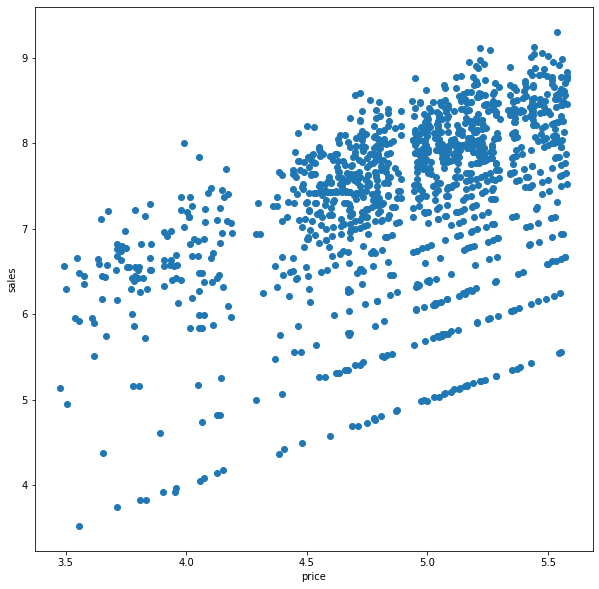

In [12]:
# Data visualization
%matplotlib inline
plt.figure(figsize = (10,10))
plt.scatter(snack_df.log_price.values, snack_df.log_sales.values)
plt.xlabel('price')
plt.ylabel('sales')
plt.show()
plt.close()

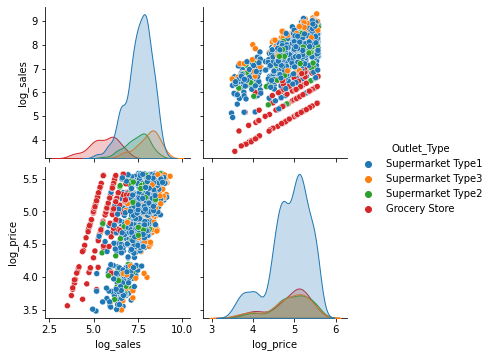

In [26]:
small_df = snack_df[['log_sales', 'log_price', 'Outlet_Type']]
sns.pairplot(small_df, hue = 'Outlet_Type')

In [13]:
# Set up panel indexing
# Item_Identifier
id_data = snack_df.Item_Identifier.values
id_unique = np.unique(id_data)

id_num = []
for itm in id_data:
    id_idx = np.where(id_unique == itm)
    id_num.append(id_idx[0][0])
snack_df['Item_Identifier'] = id_num

# Outlet_Identifier
outlet_data = snack_df.Outlet_Identifier.values
outlet_unique = np.unique(outlet_data)

outlet_num = []
for outlet in outlet_data:
    outlet_idx = np.where(outlet_unique == outlet)
    outlet_num.append(outlet_idx[0][0])
snack_df['Outlet_Identifier'] = outlet_num

panel_df = snack_df.set_index(['Item_Identifier', 'Outlet_Identifier'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# NOTE: because there is no time dimension, this is only a cross-sectional model! Not a panel model

In [15]:
exog_vars = ['Item_MRP', 'Outlet_Type_cat']
# ['Item_Visibility', 'Item_MRP', 'Outlet_Size_cat', 'Outlet_Location_Type_cat', 'Outlet_Type_cat']
exog_dat = sm.add_constant(panel_df[exog_vars])
model_pooled = PooledOLS(panel_df.Item_Outlet_Sales, exog_dat)
pooled_res = model_pooled.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:      Item_Outlet_Sales   R-squared:                        0.5183
Estimator:                  PooledOLS   R-squared (Between):              0.7377
No. Observations:                1200   R-squared (Within):               0.3726
Date:                Sat, Mar 13 2021   R-squared (Overall):              0.5183
Time:                        11:49:35   Log-likelihood                -1.019e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      321.49
Entities:                         220   P-value                           0.0000
Avg Obs:                       5.4545   Distribution:                  F(4,1195)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             321.49
                            

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


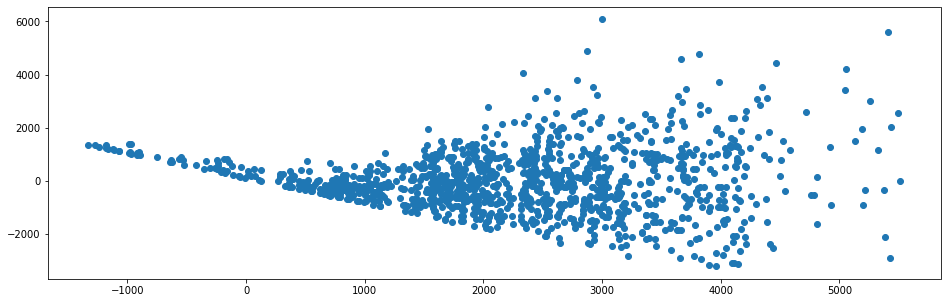

In [16]:
%matplotlib inline
plt.figure(figsize = (16,5))
plt.scatter(pooled_res.fitted_values, pooled_res.resids)
plt.show()
plt.close()

In [17]:
#####################################
# log linear model

In [18]:
exog_vars_2 = ['log_price', 'Outlet_Type_cat']
# ['Item_Visibility', 'log_price', 'Outlet_Size_cat', 'Outlet_Location_Type_cat', 'Outlet_Type_cat']
exog_dat2 = sm.add_constant(panel_df[exog_vars_2])
model_pooled2 = PooledOLS(panel_df.log_sales, exog_dat2)
pooled_res2 = model_pooled2.fit()
print(pooled_res2)

                          PooledOLS Estimation Summary                          
Dep. Variable:              log_sales   R-squared:                        0.7143
Estimator:                  PooledOLS   R-squared (Between):              0.8146
No. Observations:                1200   R-squared (Within):               0.6555
Date:                Sat, Mar 13 2021   R-squared (Overall):              0.7143
Time:                        11:49:43   Log-likelihood                   -936.85
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      747.04
Entities:                         220   P-value                           0.0000
Avg Obs:                       5.4545   Distribution:                  F(4,1195)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             747.04
                            

In [ ]:
%matplotlib inline
plt.figure(figsize = (16,5))
plt.scatter(pooled_res2.fitted_values, pooled_res2.resids)
plt.show()
plt.close()

In [50]:
#####################################
# Train, Test, Performance metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [51]:
ML_df = panel_df[['log_sales', 'log_price', 'Outlet_Type']]

In [52]:
print(ML_df.corr())

           log_sales  log_price
log_sales   1.000000   0.485652
log_price   0.485652   1.000000


In [53]:
X = ML_df[['log_price', 'Outlet_Type']]
y = ML_df[['log_sales']]

In [54]:
X = pd.get_dummies(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
train_df, test_df = train_test_split(panel_df, test_size = 0.3, random_state = 123)

In [56]:
# run regression on train data
train_vars = ['log_price', 'Outlet_Type_cat']
train_exog_dat = sm.add_constant(train_df[train_vars])
train_model_pooled = PooledOLS(train_df.log_sales, train_exog_dat)
train_res = train_model_pooled.fit()
print(train_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:              log_sales   R-squared:                        0.7229
Estimator:                  PooledOLS   R-squared (Between):              0.8039
No. Observations:                 840   R-squared (Within):               0.6461
Date:                Sat, Mar 13 2021   R-squared (Overall):              0.7229
Time:                        12:15:13   Log-likelihood                   -649.58
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      544.52
Entities:                         220   P-value                           0.0000
Avg Obs:                       3.8182   Distribution:                   F(4,835)
Min Obs:                       0.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             544.52
                            

In [58]:
ML_model = LinearRegression()
ML_model.fit(X_train, y_train)
print(ML_model.intercept_)
print(ML_model.coef_)

[1.92052602]
[[ 1.07016377 -1.57108106  0.41580704  0.24746345  0.90781057]]


In [59]:
predictions = ML_model.predict(X_test)

In [60]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
EVS = explained_variance_score(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

In [61]:
print('EVS = ', EVS)
print('MAE = ', MAE)
print('MSE = ', MSE)
print('R2 = ', R2)

EVS =  0.6914220210276912
MAE =  0.4248695087511258
MSE =  0.29065082304412726
R2 =  0.6910961966484084


In [62]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     544.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          6.27e-231
Time:                        12:22:01   Log-Likelihood:                -649.58
No. Observations:                 840   AIC:                             1309.
Df Residuals:                     835   BIC:                             1333.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
